In [1]:
import numpy as np 
import pandas as pd

In [2]:
# csv 파일로 변경된 데이터 값 불러오기

data = pd.read_csv('dataSets/mediapipe.csv')
column = data.columns
data= data.iloc[:,1:]

data

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,z11,z12,z13,z14,z15,z16,z17,z18,z19,z20
0,0.186383,0.251187,0.360016,0.473480,0.558991,0.477310,0.584757,0.546882,0.489465,0.478769,...,-0.131922,-0.135582,0.066776,-0.025102,-0.077858,-0.074033,0.103381,0.062303,0.044012,0.053904
1,0.250211,0.298972,0.402348,0.519455,0.604208,0.413372,0.599275,0.611082,0.570264,0.440738,...,-0.198733,-0.151086,-0.096002,-0.122502,-0.105665,-0.079360,0.002251,-0.029863,-0.045219,-0.045394
2,0.341824,0.264771,0.305050,0.428784,0.551636,0.402048,0.544363,0.548606,0.534288,0.492012,...,-0.695656,-0.691024,-0.294090,-0.510941,-0.521770,-0.481957,-0.217596,-0.385357,-0.417260,-0.395146
3,0.390884,0.442509,0.553363,0.640008,0.681343,0.600830,0.750509,0.711600,0.661621,0.607521,...,-0.038060,-0.030921,0.080954,0.048886,0.010195,0.010063,0.167426,0.143331,0.118522,0.114052
4,0.353266,0.430721,0.536456,0.644772,0.749812,0.665687,0.771578,0.729607,0.672782,0.661513,...,-0.171823,-0.182716,0.065049,-0.055674,-0.121749,-0.120082,0.110191,0.003934,-0.051233,-0.055715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.271832,0.291349,0.372594,0.465932,0.557796,0.570142,0.667962,0.630019,0.586173,0.592574,...,-0.478598,-0.495101,-0.133765,-0.314968,-0.395619,-0.408068,-0.087811,-0.222825,-0.300318,-0.321964
149,0.247995,0.328047,0.472244,0.561165,0.582973,0.584923,0.737603,0.648665,0.570885,0.572320,...,0.028614,0.065515,0.061183,0.085415,0.082488,0.063542,0.190321,0.199665,0.180421,0.155383
150,0.625294,0.602278,0.510118,0.464489,0.462901,0.393123,0.302482,0.389339,0.447626,0.374686,...,0.064808,0.075305,0.153763,0.148545,0.117686,0.103443,0.236673,0.230135,0.210439,0.207023
151,0.687731,0.651781,0.541672,0.449835,0.423677,0.365075,0.289556,0.387927,0.444770,0.349333,...,0.080233,0.103801,0.009003,0.118702,0.144555,0.125317,0.112767,0.198723,0.206125,0.187932


In [3]:
x = data.iloc[13,0:21].T
y = data.iloc[13, 21:42].T
z = data.iloc[13,42:63].T

In [4]:
# 벡터로 변환

vector_columnList = [0,1,2,3,4,5,6,7,8,9,
                    10,11,12,13,14,15,16,17,18,19,
                    ]
vector_direction = [[0,1], [1,2], [2,3], [3,4], [0,5], [5,6], [6,7], [7,8], [0,9], [9,10],
                    [10,11], [11,12], [0,13], [13,14], [14,15], [15,16], [0,17], [17,18], [18,19], [19,20],
                    ]


vector_data = []
for idx, v in enumerate(vector_direction):
    df = pd.DataFrame([data['x'+str(v[1])]-data['x'+str(v[0])]], index=['x'])
    df.loc['y'] = data['y'+str(v[1])]-data['y'+str(v[0])]
    df.loc['z'] = data['z'+str(v[1])]-data['z'+str(v[0])]
    vector_data.append(df.T)


In [5]:
# 필요한 각도 계산

degree_list1 = [[0,3],[5,9],[9,13],[13,17]]
degree_list2 = [[1,2], [2,3], [4,5], [5,6], [6,7], [8,9], [9,10], [10,11], [12,13], [13,14],
                [14,15], [16,17], [17,18], [18,19]]

result = pd.DataFrame()

for d in degree_list1:
    a= vector_data[d[0]].x*vector_data[d[1]].x + vector_data[d[0]].y*vector_data[d[1]].y + vector_data[d[0]].z*vector_data[d[1]].z
    b=((vector_data[d[0]].x**2 + vector_data[d[0]].y**2 + vector_data[d[0]].z**2)**0.5)*((vector_data[d[1]].x**2 + vector_data[d[1]].y**2 + vector_data[d[1]].z**2)**0.5)
    result['vec'+str(d[0])+'-'+str(d[1])] = np.arccos(a/b)

for d in degree_list2:
    a= -vector_data[d[0]].x*vector_data[d[1]].x -vector_data[d[0]].y*vector_data[d[1]].y - vector_data[d[0]].z*vector_data[d[1]].z
    b=((vector_data[d[0]].x**2 + vector_data[d[0]].y**2 + vector_data[d[0]].z**2)**0.5)*((vector_data[d[1]].x**2 + vector_data[d[1]].y**2 + vector_data[d[1]].z**2)**0.5)
    result['vec'+str(d[0])+'-'+str(d[1])] = np.arccos(a/b)

result

,vec0-3,vec5-9,vec9-13,vec13-17,vec1-2,vec2-3,vec4-5,vec5-6,vec6-7,vec8-9,vec9-10,vec10-11,vec12-13,vec13-14,vec14-15,vec16-17,vec17-18,vec18-19
0,1.762155,0.125052,0.167234,0.313867,2.202589,2.743714,1.781234,1.925822,2.665127,1.789793,1.686235,2.509148,1.742027,1.748433,2.430010,2.158786,1.545277,1.930397
1,2.071661,0.121802,0.145773,0.160191,2.590699,2.062816,1.792183,1.970836,2.678003,1.891460,1.801553,2.544806,1.770085,2.031883,2.534830,1.717598,2.257920,2.702633
2,1.598537,0.342983,0.241058,0.090805,2.422189,2.808305,2.019828,2.109864,2.747187,1.932095,2.245336,2.341194,1.849771,2.044627,1.901980,1.941782,2.183139,2.044689
3,2.369605,0.195453,0.175645,0.084975,2.506200,2.509398,1.516415,1.987895,2.278817,1.651174,1.742618,1.864226,1.672523,1.821860,2.008993,1.728090,1.948045,2.038501
4,1.326649,0.087641,0.141214,0.120976,2.545530,3.089323,1.614665,2.326130,2.713479,1.735155,2.142601,2.507122,1.869685,2.103292,2.248729,1.891522,2.279800,2.164351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,1.658694,0.015483,0.154449,0.077052,2.339744,2.924068,2.053065,2.296124,2.912050,2.256952,2.127720,2.687432,2.317427,2.173102,2.576936,2.371428,2.420071,2.604654
149,2.650022,0.126032,0.150146,0.060348,2.152258,2.299411,1.715103,2.058900,2.348453,1.474679,2.012741,2.205149,1.251356,2.029086,1.958416,1.218518,2.257259,2.230205
150,2.740618,0.132281,0.079323,0.110865,2.467077,1.844165,1.775674,2.016796,2.117110,1.568703,1.883468,1.888826,1.396342,1.847100,2.017053,1.300529,2.137756,1.941233
151,2.645858,0.048882,0.052902,0.013119,2.351652,1.755985,1.921436,1.820874,2.063383,1.684742,1.819515,2.007802,1.552524,1.744261,1.784108,1.517335,2.037802,1.645181


In [6]:
# val = (result>125).replace({True:1, False:0}) # 1: 핀거 0: 굽힌거
# val
# 각도에 따라 핀지 굽한지를 인식해 보았는데 이상적인 결과가 나오지 않아 방향을 바꿔보았다.

In [7]:
# 엄지 손까락을 굽혔을 경우

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

thumb_true=result[result['vec0-3']*180/np.pi>=90].iloc[:,1:]

# 엄지 손가락, 손가락 마디 사이에 대한 가중치
thumb_true.iloc[:,:3] *=2 

thumb_true

,vec5-9,vec9-13,vec13-17,vec1-2,vec2-3,vec4-5,vec5-6,vec6-7,vec8-9,vec9-10,vec10-11,vec12-13,vec13-14,vec14-15,vec16-17,vec17-18,vec18-19
0,0.250103,0.334468,0.627733,2.202589,2.743714,1.781234,1.925822,2.665127,1.789793,1.686235,2.509148,1.742027,1.748433,2.430010,2.158786,1.545277,1.930397
1,0.243604,0.291546,0.320382,2.590699,2.062816,1.792183,1.970836,2.678003,1.891460,1.801553,2.544806,1.770085,2.031883,2.534830,1.717598,2.257920,2.702633
2,0.685966,0.482116,0.181610,2.422189,2.808305,2.019828,2.109864,2.747187,1.932095,2.245336,2.341194,1.849771,2.044627,1.901980,1.941782,2.183139,2.044689
3,0.390905,0.351290,0.169950,2.506200,2.509398,1.516415,1.987895,2.278817,1.651174,1.742618,1.864226,1.672523,1.821860,2.008993,1.728090,1.948045,2.038501
5,0.284863,0.183565,0.304681,2.200887,2.378564,1.817860,1.949682,2.536859,1.704189,1.967309,2.350734,1.597283,1.970704,2.196255,1.581887,2.025016,2.406768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.030965,0.308898,0.154103,2.339744,2.924068,2.053065,2.296124,2.912050,2.256952,2.127720,2.687432,2.317427,2.173102,2.576936,2.371428,2.420071,2.604654
149,0.252065,0.300293,0.120697,2.152258,2.299411,1.715103,2.058900,2.348453,1.474679,2.012741,2.205149,1.251356,2.029086,1.958416,1.218518,2.257259,2.230205
150,0.264561,0.158647,0.221731,2.467077,1.844165,1.775674,2.016796,2.117110,1.568703,1.883468,1.888826,1.396342,1.847100,2.017053,1.300529,2.137756,1.941233
151,0.097765,0.105804,0.026237,2.351652,1.755985,1.921436,1.820874,2.063383,1.684742,1.819515,2.007802,1.552524,1.744261,1.784108,1.517335,2.037802,1.645181


ValueError: 'c' argument has 17 elements, which is inconsistent with 'x' and 'y' with size 135.

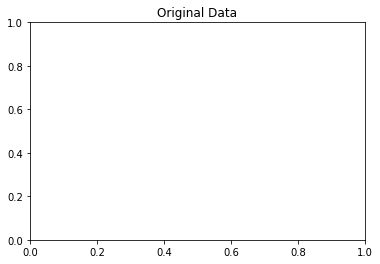

In [8]:
# 실제 데이터, kmeans, DBSCAN을 pca로 plot

pca = PCA(n_components=2)
val = pca.fit_transform(thumb_true)
df = pd.DataFrame(val, columns=['x','y'])

plt.title('Original Data')
label = [0 for x in range(0,153,1)]
#label = [0, 0, 1,2, 0,3,1,2,0,3,4,4,1,6,1,1,1]
#label = [1,2,3,4,5,1,2,3,4,5,0,0,6,7,8,6,7,8,9,9,9]
plt.scatter(df.x, df.y, c=label,  cmap='tab20')
plt.colorbar()
plt.show()

kmeans = KMeans(init='k-means++',n_clusters=5)
predict = kmeans.fit_predict(thumb_true)
plt.title('Kmeans')
plt.scatter(df.x, df.y, c= predict, cmap='tab20')
plt.colorbar()
plt.show()

dbscan = DBSCAN(min_samples=1, eps=1)
predict2 = dbscan.fit_predict(thumb_true)
plt.title('DBSCAN')
plt.scatter(df.x, df.y, c= predict2, cmap='tab20')
plt.colorbar()
plt.show()

In [ ]:
# 점과 점사이 유사도 계산 알고리즘

def fit_predict(df, limit=1.0):
    distance = pd.DataFrame(columns=['x','y', 'value'])
    predict = pd.Series(data=[0 for x in range(0,len(df),1)], index=df.index)
    count=1
    for i in range(0,len(df.index),1):
        for j in range(i+1,len(df.index),1):
            row1=np.array(df.iloc[i,:])
            row2=np.array(df.iloc[j,:])
            distance=distance.append({'x': df.index[i], 'y': df.index[j],'value':((row1-row2)**2).sum()}, ignore_index=True)
    
    distance=distance[distance.value<limit] # 거리 제한

    for k in distance.itertuples():
        try:
            x = distance.loc[distance.value.idxmin()]
            predict[int(x.x)]=count
            predict[int(x.y)]=count
            count += 1
            distance = distance[distance['x'] != x.x]
            distance = distance[distance['x'] != x.y]
            distance = distance[distance['y'] != x.x]
            distance = distance[distance['y'] != x.y]
        except:
            break
    return predict
    

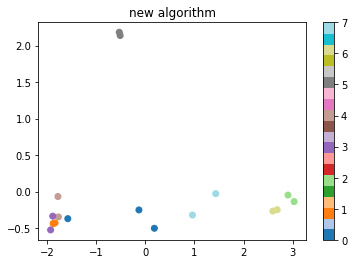

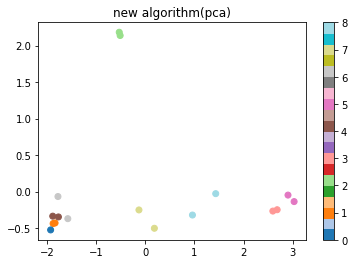

    original  pca
0          2    5
6          6    3
13         1    1
14         0    7
15         2    5
16         7    8
18         1    1
19         0    7
20         6    3
21         7    8
22         5    2
26         5    2
30         4    4
31         4    6
33         0    6
34         3    4
37         3    0


In [ ]:
# 원본 데이터를 이용했을 때 군집 형성

predict3=fit_predict(thumb_true)
plt.title('new algorithm')
plt.scatter(df.x, df.y, c= predict3, cmap='tab20')
plt.colorbar()
plt.show()

#pca 데이터를 이용했을 때 군집 형성

predict4=fit_predict(df,1)
plt.title('new algorithm(pca)')
plt.scatter(df.x, df.y, c= predict4, cmap='tab20')
plt.colorbar()
plt.show()

predict4.index = list(predict3.index)
v= pd.DataFrame([predict3, predict4],index=['original', 'pca'])
print(v.T)

#거리를 1로 제한할때, 1.5로제한할때 각각 비교해볼것 (1일때는 어떤점은 outlier 처리됨)

In [ ]:
thumb_false=result[result['vec0-3']*180/np.pi<=90].iloc[:]

# 엄지 손가락, 손가락 마디 사이에 대한 가중치
thumb_false.iloc[:,:4] *=2
thumb_false*180/np.pi

,vec0-3,vec5-9,vec9-13,vec13-17,vec1-2,vec2-3,vec4-5,vec5-6,vec6-7,vec8-9,vec9-10,vec10-11,vec12-13,vec13-14,vec14-15,vec16-17,vec17-18,vec18-19
1,37.886364,35.498956,4.332360,32.854642,176.732121,154.115381,127.217569,25.758556,142.996784,117.578023,54.284525,108.752181,123.032209,48.036669,122.051983,129.324047,59.098790,120.519579
2,44.125927,68.503645,6.478582,20.188848,177.087003,152.286578,135.180214,176.804773,173.403587,110.184310,67.626823,117.919666,115.359032,55.772462,122.570639,125.180691,55.520581,118.220984
3,32.204340,49.536905,68.770569,8.547480,170.157172,153.759326,157.460272,170.438200,173.723876,152.396905,173.875121,178.913774,132.161945,59.923778,154.990980,139.691236,67.919197,159.985256
4,59.607894,40.768433,38.053110,67.858351,164.782787,157.273395,159.961853,170.627603,168.343707,164.709574,173.126655,172.893404,158.432903,172.267140,170.412870,129.228572,97.921082,161.274683
5,45.699141,30.663173,22.719227,52.236353,164.446704,152.843896,169.506783,172.280183,170.130629,177.320101,164.789558,170.732170,172.207789,161.215290,174.121897,176.418332,163.463794,172.923845
7,39.718888,22.159421,3.790287,15.311556,179.681940,163.743704,127.162233,53.669414,120.766205,129.007969,63.731420,99.311191,137.984740,53.016565,115.541282,148.559099,60.906926,113.767555
8,27.522669,71.807268,5.268858,19.749374,176.678589,167.521243,135.352975,178.073638,168.113807,121.405191,75.799731,125.973555,130.748323,60.416253,130.127979,143.374624,51.368778,134.554724
9,24.498550,29.789413,90.043946,9.728263,176.514172,167.742394,155.396646,171.766299,172.584224,155.262372,168.028425,176.604722,125.006989,75.346556,145.764528,133.312945,77.134942,144.239880
10,33.405515,19.355180,38.591466,59.562111,176.640137,166.997267,146.463855,168.540895,172.470292,159.662106,168.848540,174.943019,159.926029,175.953148,170.523456,145.388849,99.071144,143.003361
11,14.286379,20.359653,24.745975,40.897723,179.031515,164.509540,162.273534,166.645745,175.740136,170.948292,164.095232,177.045493,177.875860,162.701959,176.727392,172.937501,172.930360,174.419878


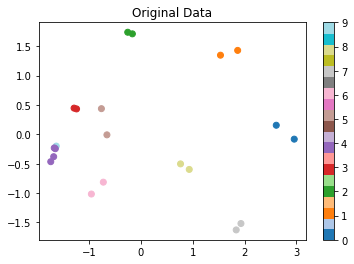

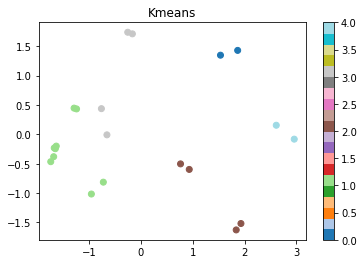

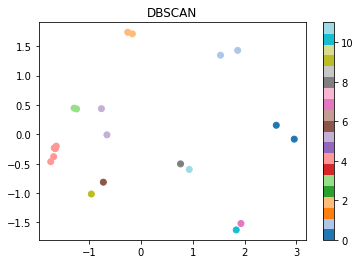

In [ ]:
# 실제 데이터, kmeans, DBSCAN을 pca로 plot

pca = PCA(n_components=2)
val = pca.fit_transform(thumb_false.iloc[:,1:])
df = pd.DataFrame(val, columns=['x','y'])

plt.title('Original Data')
label = [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 5, 6, 7, 8, 6, 7, 8, 9, 4, 4]
plt.scatter(df.x, df.y, c= label, cmap='tab20')
plt.colorbar()
plt.show()

kmeans = KMeans(init='k-means++',n_clusters=5)
predict = kmeans.fit_predict(thumb_false)
plt.title('Kmeans')
plt.scatter(df.x, df.y, c= predict, cmap='tab20')
plt.colorbar()
plt.show()

dbscan = DBSCAN(min_samples=1, eps=1)
predict2 = dbscan.fit_predict(thumb_false)
plt.title('DBSCAN')
plt.scatter(df.x, df.y, c= predict2, cmap='tab20')
plt.colorbar()
plt.show()


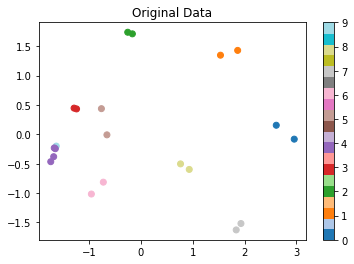

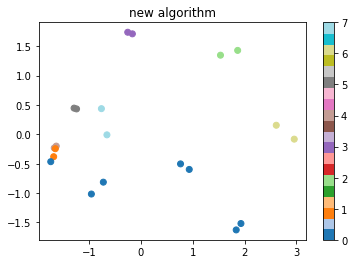

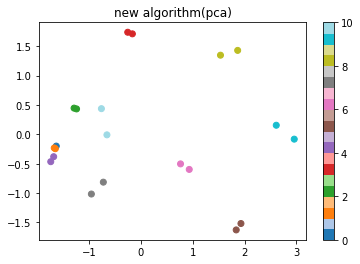

    original  new_al  pca
0          0       6    9
1          1       2    8
2          2       3    3
3          3       5    2
4          4       1    4
5          0       6    9
6          1       2    8
7          2       3    3
8          3       5    2
9          4       0    4
10         5       7   10
11         5       7   10
12         6       0    7
13         7       0    5
14         8       0    6
15         6       0    7
16         7       0    5
17         8       0    6
18         9       4    0
19         4       4    1
20         4       1    1


In [ ]:
# 원본
plt.title('Original Data')
label = [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 5, 6, 7, 8, 6, 7, 8, 9, 4, 4]
plt.scatter(df.x, df.y, c= label, cmap='tab20')
plt.colorbar()
plt.show()

# 원본 데이터를 이용했을 때 군집 형성

predict3=fit_predict(thumb_false)
plt.title('new algorithm')
plt.scatter(df.x, df.y, c= predict3, cmap='tab20')
plt.colorbar()
plt.show()

#pca 데이터를 이용했을 때 군집 형성

predict4=fit_predict(df,1)
plt.title('new algorithm(pca)')
plt.scatter(df.x, df.y, c= predict4, cmap='tab20')
plt.colorbar()
plt.show()

predict4.index = list(predict3.index)
v= pd.DataFrame([label,predict3, predict4],index=['original','new_al', 'pca'])
print(v.T)

#거리를 1로 제한할때, 1.5로제한할때 각각 비교해볼것 (1일때는 어떤점은 outlier 처리됨)